# CEGE0004: Assignment 1
# Bayesian Learning
In this notebook I will implement the Naive Bayes classifier in scikit-learn and predict the default of credit card client.

## The Dataset

I am working with the default of credit card clients Data Set from UCI Machine Learning Repository, to to classify and predict customer defaults. The link of dataset is shown below:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The dataset employes a binary variable, default (Yes = 1, No = 0), as the response variable. At the same time, the following 23 variables are used as explanatory variables:

X1: Amount of the given credit: it includes both the individual consumer credit and his/her family credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment from April to September. (e.g. X6 = the repayment status in September; X7 = the repayment status in August; . . .) The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; . . .; 9 = payment delay for nine months and above.

X12 - X17: Amount of bill statement. (e.g. X12 = amount of bill statement in September; X13 = amount of bill statement in August; . . .).

X18 - X23: Amount of previous payment. (e.g. X18 = amount paid in September; X19 = amount paid in August, 2005; . . .).

## Start working by importing the required packages and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

First try to fit model and predict the result without any data process

Change the data type of all columns to string

In [3]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)

Combine all columns

In [4]:
x_train["all columns"] = x_train[x_train.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)
x_test["all columns"] = x_test[x_test.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)

Get the combination of each row

In [5]:
xs_train = x_train["all columns"].values
xs_test = x_test["all columns"].values

Change the type of the result column to numpy.ndarray

In [6]:
ys_train = y_train.values.reshape(-1)
ys_test = y_test.values.reshape(-1)

Use CountVecorizer class in Scikit-learn to convert a collection of texts into a matrix of token counts

In [7]:
vectorizer = CountVectorizer()
xs_train_prep = vectorizer.fit_transform(xs_train)
xs_test_prep = vectorizer.transform(xs_test)

Fit the model with arbitrary parameters

In [8]:
multinomial_nb = MultinomialNB(alpha=0, fit_prior=False)
multinomial_nb.fit(xs_train_prep, ys_train)

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


MultinomialNB(alpha=0, fit_prior=False)

Perform the prediction and print the accuracy of training set and test set

In [9]:
ys_train_pred = multinomial_nb.predict(xs_train_prep)
accuracy_train = accuracy_score(ys_train, ys_train_pred)
print('Training accuracy:', accuracy_train)
ys_test_pred = multinomial_nb.predict(xs_test_prep)
accuracy = accuracy_score(ys_test, ys_test_pred)
print(f"MultinomialNB accuracy (before GridSearchCV): {accuracy:.4f}")
print(classification_report(ys_test, ys_test_pred))

Training accuracy: 0.94075
MultinomialNB accuracy (before GridSearchCV): 0.7047
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4703
           1       0.29      0.25      0.27      1297

    accuracy                           0.70      6000
   macro avg       0.54      0.54      0.54      6000
weighted avg       0.69      0.70      0.70      6000



As you can see here, the accuracy of training set is 94.08% and the accuracy of test set is only 70.47%

Next, let us add some data process and use GridsearchCV to see if the accuracy could be improved

## Data processing and preparation

Load the dataset again to keep the origin type of each column

In [10]:
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

Classify "LIMIT_BAL_NOR" column as the "high" category if the amount is greater than 100000 (corresponding to about -0.65 after standardisation), otherwise it is the "low" category

In [11]:
x_train["LIMIT_BAL_NOR"] = x_train.apply(lambda x: "high" if x["LIMIT_BAL"] >= -0.65 else "low", axis = 1)
x_test["LIMIT_BAL_NOR"] = x_test.apply(lambda x: "high" if x["LIMIT_BAL"] >= -0.65 else "low", axis = 1)

Classify "SEX" column

In [12]:
x_train["SEX"] = x_train.apply(lambda x: "male" if x["SEX"] == 1 else "female", axis = 1)
x_test["SEX"] = x_test.apply(lambda x: "male" if x["SEX"] == 1 else "female", axis = 1)

Classify "EDUCATION" column

In [13]:
x_train["EDUCATION"] = x_train.apply(lambda x: "graduate" if x["EDUCATION"] == 1
else ("university" if x["EDUCATION"] == 2
      else ("high" if x["EDUCATION"] == 3
            else "others")), axis = 1)
x_test["EDUCATION"] = x_test.apply(lambda x: "graduate" if x["EDUCATION"] == 1
else ("university" if x["EDUCATION"] == 2
      else ("high" if x["EDUCATION"] == 3
            else "others")), axis = 1)

Classify "MARRIAGE" column

In [14]:
x_train["MARRIAGE"] = x_train.apply(lambda x: "married" if x["MARRIAGE"] == 1
else ("single" if x["MARRIAGE"] == 2
      else "others"), axis = 1)
x_test["MARRIAGE"] = x_test.apply(lambda x: "married" if x["MARRIAGE"] == 1
else ("single" if x["MARRIAGE"] == 2
      else "others"), axis = 1)

Classify "AGE" column. Here the binning technique is used, dividing all ages equally into 10 intervals

In [15]:
age_categories = x_train["AGE"].unique()
one_level = int((age_categories.max()-age_categories.min())/10)
level = 1
for i in range(age_categories.min(),age_categories.max(),one_level):
    x_train["AGE_LEVEL"+str(level)] = x_train.apply(lambda x: "AGE_LEVEL"+str(level) if i <= x["AGE"] < i+one_level else "", axis = 1)
    x_test["AGE_LEVEL"+str(level)] = x_test.apply(lambda x: "AGE_LEVEL"+str(level) if i <= x["AGE"] < i+one_level else "", axis = 1)
    level += 1

Process columns 6 to 11, based on the attribute information mentioned above

In [16]:
def f(x):
    x = int(x)
    if x <= 0:
        return "duly"
    elif x == 1:
        return "one delay"
    elif x == 2:
        return "two delay"
    elif x == 3:
        return "three delay"
    elif x == 4:
        return "four delay"
    elif x == 5:
        return "five delay"
    elif x == 6:
        return "six delay"
    elif x == 7:
        return "seven delay"
    elif x == 8:
        return "eight delay"
    else:
        return "nine delay"
    
x_train["PAY_0"] = x_train["PAY_0"].apply(lambda x: f(x))
x_train["PAY_2"] = x_train["PAY_2"].apply(lambda x: f(x))
x_train["PAY_3"] = x_train["PAY_3"].apply(lambda x: f(x))
x_train["PAY_4"] = x_train["PAY_4"].apply(lambda x: f(x))
x_train["PAY_5"] = x_train["PAY_5"].apply(lambda x: f(x))
x_train["PAY_6"] = x_train["PAY_6"].apply(lambda x: f(x))
x_test["PAY_0"] = x_test["PAY_0"].apply(lambda x: f(x))
x_test["PAY_2"] = x_test["PAY_2"].apply(lambda x: f(x))
x_test["PAY_3"] = x_test["PAY_3"].apply(lambda x: f(x))
x_test["PAY_4"] = x_test["PAY_4"].apply(lambda x: f(x))
x_test["PAY_5"] = x_test["PAY_5"].apply(lambda x: f(x))
x_test["PAY_6"] = x_test["PAY_6"].apply(lambda x: f(x))

Process columns 12 to 23, based on the attribute information mentioned above. If the amount paid in the following month is greater than the amount billed in the previous month, it is assigned the value "duly_pay", otherwise it is assigned the value "delay_pay"

In [17]:
x_train["PAY_BILL_2"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT2"] <= x["PAY_AMT1"] else "delay_pay", axis = 1)
x_train["PAY_BILL_3"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT3"] <= x["PAY_AMT2"] else "delay_pay", axis = 1)
x_train["PAY_BILL_4"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT4"] <= x["PAY_AMT3"] else "delay_pay", axis = 1)
x_train["PAY_BILL_5"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT5"] <= x["PAY_AMT4"] else "delay_pay", axis = 1)
x_train["PAY_BILL_6"] = x_train.apply(lambda x: "duly_pay" if x["BILL_AMT6"] <= x["PAY_AMT5"] else "delay_pay", axis = 1)
x_test["PAY_BILL_2"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT2"] <= x["PAY_AMT1"] else "delay_pay", axis = 1)
x_test["PAY_BILL_3"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT3"] <= x["PAY_AMT2"] else "delay_pay", axis = 1)
x_test["PAY_BILL_4"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT4"] <= x["PAY_AMT3"] else "delay_pay", axis = 1)
x_test["PAY_BILL_5"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT5"] <= x["PAY_AMT4"] else "delay_pay", axis = 1)
x_test["PAY_BILL_6"] = x_test.apply(lambda x: "duly_pay" if x["BILL_AMT6"] <= x["PAY_AMT5"] else "delay_pay", axis = 1)

Now let's see what the data frame looks like

In [18]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,AGE_LEVEL8,AGE_LEVEL9,AGE_LEVEL10,AGE_LEVEL11,AGE_LEVEL12,PAY_BILL_2,PAY_BILL_3,PAY_BILL_4,PAY_BILL_5,PAY_BILL_6
0,-1.136720,female,high,married,44,duly,duly,two delay,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,duly_pay,duly_pay
1,0.713055,female,university,single,30,duly,duly,duly,duly,duly,...,,,,,,duly_pay,duly_pay,duly_pay,duly_pay,duly_pay
2,-1.136720,male,university,married,39,two delay,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
3,-1.059646,male,university,married,23,two delay,two delay,two delay,two delay,two delay,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
4,-1.213794,male,university,married,29,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-1.059646,male,university,single,38,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
23996,0.327685,female,graduate,married,33,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
23997,-0.288907,female,high,married,43,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
23998,-0.905498,female,high,married,29,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay


In [19]:
x_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,AGE_LEVEL8,AGE_LEVEL9,AGE_LEVEL10,AGE_LEVEL11,AGE_LEVEL12,PAY_BILL_2,PAY_BILL_3,PAY_BILL_4,PAY_BILL_5,PAY_BILL_6
0,-1.136720,male,graduate,single,33,one delay,two delay,two delay,two delay,two delay,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
1,-1.136720,female,university,single,35,duly,duly,two delay,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
2,0.481833,female,graduate,married,44,one delay,duly,duly,duly,duly,...,,,,,,duly_pay,duly_pay,duly_pay,duly_pay,duly_pay
3,-0.520128,male,university,married,42,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
4,-0.134759,male,graduate,single,29,duly,duly,duly,duly,duly,...,,,,,,duly_pay,duly_pay,duly_pay,duly_pay,duly_pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.635981,female,university,married,35,one delay,two delay,two delay,two delay,two delay,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
5996,0.327685,female,graduate,married,46,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay
5997,-0.674276,male,high,married,27,duly,duly,duly,duly,duly,...,,,,,,delay_pay,delay_pay,duly_pay,delay_pay,delay_pay
5998,-1.136720,male,university,single,24,two delay,two delay,two delay,two delay,two delay,...,,,,,,delay_pay,delay_pay,delay_pay,delay_pay,delay_pay


Remove columns that are not needed in the training, such as the original "LIMIT_BAL" and "AGE" columns

In [20]:
x_train = x_train.drop(x_train.columns[[0,4,11,12,13,14,15,16,17,18,19,20,21,22]], axis=1)
x_test = x_test.drop(x_test.columns[[0,4,11,12,13,14,15,16,17,18,19,20,21,22]], axis=1)

Combine the values of all columns into one

In [21]:
x_train["all columns"] = x_train[x_train.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)
x_test["all columns"] = x_test[x_test.columns[0:]].apply(lambda x: " ".join(x.dropna()), axis = 1)
xs_train = x_train["all columns"].values
xs_test = x_test["all columns"].values
ys_train = y_train.values.reshape(-1)
ys_test = y_test.values.reshape(-1)

Use CountVecorizer class in Scikit-learn to convert a collection of texts into a matrix of token counts

In [22]:
vectorizer = CountVectorizer()
xs_train_prep = vectorizer.fit_transform(xs_train)
xs_test_prep = vectorizer.transform(xs_test)

## Model fitting, hype parameters and validation

## MultinomialNB
First try MultinomialNB just fitted, before GridSearchCV

In [23]:
multinomial_nb = MultinomialNB(alpha=0, fit_prior=False)
multinomial_nb.fit(xs_train_prep, ys_train)
ys_train_pred = multinomial_nb.predict(xs_train_prep)
accuracy_train = accuracy_score(ys_train, ys_train_pred)
print('Training accuracy:', accuracy_train)
ys_test_pred = multinomial_nb.predict(xs_test_prep)
accuracy = accuracy_score(ys_test, ys_test_pred)
print(f"MultinomialNB accuracy (before GridSearchCV): {accuracy:.4f}")
print(classification_report(ys_test, ys_test_pred))

Training accuracy: 0.77
MultinomialNB accuracy (before GridSearchCV): 0.7763
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4703
           1       0.48      0.54      0.51      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.79      0.78      0.78      6000



D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


### It is obvious that after data process, the test set accuracy is improved to 77.63%, compared with before. Next, let's try to use GridSearchCV to further improve the accuracy

In [24]:
MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior', 'force_alpha'])

## GridsearchCV for hype parameters and validation
Find the best hyper-parameter values via grid search of scikit-learn. This will perform a k-fold cross-validation on the training set

Here I will not set the value of class_prior as I do not know the prior probability of each attribute of the dataset

Also, as I set the value of alpha, the force_alpha will be set as the default value False to use the alpha parameter passed to the classifier

In [25]:
param_grid = [{
    'alpha': [0, 1, 2, 3, 4, 5],
    'fit_prior': [True, False]}]
multinomial_nb = MultinomialNB()
grid_search = GridSearchCV(multinomial_nb, param_grid, cv=5, verbose=2)
grid_search.fit(xs_train_prep, ys_train)

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ............................alpha=0, fit_prior=True; total time=   0.0s
[CV] END ............................alpha=0, fit_prior=True; total time=   0.0s
[CV] END ............................alpha=0, fit_prior=True; total time=   0.0s
[CV] END ............................alpha=0, fit_prior=True; total time=   0.0s
[CV] END ............................alpha=0, fit_prior=True; total time=   0.0s
[CV] END ...........................alpha=0, fit_prior=False; total time=   0.0s
[CV] END ...........................alpha=0, fit_prior=False; total time=   0.0s
[CV] END ...........................alpha=0, fit_prior=False; total time=   0.0s
[CV] END ...........................alpha=0, fit_prior=False; total time=   0.0s
[CV] END ...........................alpha=0, fit_prior=False; total time=   0.0s
[CV] END ............................alpha=1, fit_prior=True; total time=   0.0s
[CV] END ............................alpha=1, fi

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid=[{'alpha': [0, 1, 2, 3, 4, 5],
                          'fit_prior': [True, False]}],
             verbose=2)

Find the best hype parameters of MultinomialNB

In [26]:
grid_search.best_estimator_

MultinomialNB(alpha=4)

Fit the MultinomialNB model where the hype parameter alpha = 4 and the fit_prior is the default value True

In [27]:
multinomial_nb = MultinomialNB(alpha=4, fit_prior=True)
multinomial_nb.fit(xs_train_prep, ys_train)

MultinomialNB(alpha=4)

Predict the result and show the accuracy

In [28]:
ys_train_pred = multinomial_nb.predict(xs_train_prep)
accuracy_train = accuracy_score(ys_train, ys_train_pred)
print('Training accuracy:', accuracy_train)
ys_test_pred = multinomial_nb.predict(xs_test_prep)
accuracy = accuracy_score(ys_test, ys_test_pred)
print(f"MultinomialNB accuracy (after GridSearchCV): {accuracy:.4f}")
print(classification_report(ys_test, ys_test_pred))

Training accuracy: 0.790125
MultinomialNB accuracy (after GridSearchCV): 0.7962
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4703
           1       0.53      0.44      0.48      1297

    accuracy                           0.80      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.80      0.79      6000



### It is noted that after hype parameter selection and cross-validation using GridSearchCV, the accuracy of test set is improved to 79.62%

## GaussianNB
Try another Naive Bayes model. This time we will directly use GridSearchCV to find the best model

In [29]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

## GridsearchCV for hype parameters and validation
Hype parameter and cross validation process

Since we do not know the information about the prior probability of each category, we will not assign different values to priors parameter

In [30]:
param_grid = [{
    'var_smoothing': [1e-9, 0.5, 0.6, 0.7, 0.8, 0.9]}]
gaussion_nb = GaussianNB()
grid_search = GridSearchCV(gaussion_nb, param_grid, cv=5, verbose=2)
grid_search.fit(np.asarray(xs_train_prep.todense()), ys_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ..................................var_smoothing=0.5; total time=   0.0s
[CV] END ..................................var_smoothing=0.5; total time=   0.0s
[CV] END ..................................var_smoothing=0.5; total time=   0.0s
[CV] END ..................................var_smoothing=0.5; total time=   0.0s
[CV] END ..................................var_smoothing=0.5; total time=   0.0s
[CV] END ..................................var_smoothing=0.6; total time=   0.0s
[CV] END ..................................var_sm

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [1e-09, 0.5, 0.6, 0.7, 0.8, 0.9]}],
             verbose=2)

Find the best hype parameters of GaussianNB

In [31]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.7)

Fit the GaussianNB model where the hype parameter var_smoothing = 0.7 and the priors is the default value. It is noted that the var_smoothing is 0.7, which is not a boundary value for the range, so this parameter is the best hype parameter for this model

In [32]:
gaussion_nb = GaussianNB(priors=None, var_smoothing=0.7)
gaussion_nb.fit(np.asarray(xs_train_prep.todense()), ys_train)

GaussianNB(var_smoothing=0.7)

Predict the result and show the accuracy

In [33]:
ys_train_pred = multinomial_nb.predict(np.asarray(xs_train_prep.todense()))
accuracy_train = accuracy_score(ys_train, ys_train_pred)
print('Training accuracy:', accuracy_train)
ys_test_pred = gaussion_nb.predict(np.asarray(xs_test_prep.todense()))
accuracy = accuracy_score(ys_test, ys_test_pred)
print(f"GaussianNB accuracy (after GridSearchCV): {accuracy:.4f}")
print(classification_report(ys_test, ys_test_pred))

Training accuracy: 0.790125
GaussianNB accuracy (after GridSearchCV): 0.8085
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4703
           1       0.63      0.28      0.39      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



### It is noted that slight 1.2% accuracy improvement using GaussianNB over MultinomialNB

## BernoulliNB
Try another Naive Bayes model

In [34]:
BernoulliNB().get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior', 'force_alpha'])

Hype parameter and cross validation process

Here I will not set the value of class_prior as I do not know the prior probability of each attribute of the dataset. At the same time, the fit_prior is not be set so that the model will learn the priori probability

Also, as I set the value of alpha, the force_alpha will be set as the default value False to use the alpha parameter passed to the classifier

In [35]:
param_grid = [{
    'alpha': [-1, 0, 0.5, 1],
    'binarize': [-5, None, 5, 10, 20]}]
bernoulli_nb = BernoulliNB()
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, verbose=2)
grid_search.fit(np.asarray(xs_train_prep.todense()), ys_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..............................alpha=-1, binarize=-5; total time=   0.0s
[CV] END ..............................alpha=-1, binarize=-5; total time=   0.0s
[CV] END ..............................alpha=-1, binarize=-5; total time=   0.0s
[CV] END ..............................alpha=-1, binarize=-5; total time=   0.0s
[CV] END ..............................alpha=-1, binarize=-5; total time=   0.0s
[CV] END ............................alpha=-1, binarize=None; total time=   0.0s
[CV] END ............................alpha=-1, binarize=None; total time=   0.0s
[CV] END ............................alpha=-1, binarize=None; total time=   0.0s
[CV] END ............................alpha=-1, binarize=None; total time=   0.0s
[CV] END ............................alpha=-1, binarize=None; total time=   0.0s
[CV] END ...............................alpha=-1, binarize=5; total time=   0.0s
[CV] END ...............................alpha=-

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha un

[CV] END ................................alpha=0, binarize=5; total time=   0.0s
[CV] END ...............................alpha=0, binarize=10; total time=   0.0s
[CV] END ...............................alpha=0, binarize=10; total time=   0.0s
[CV] END ...............................alpha=0, binarize=10; total time=   0.0s
[CV] END ...............................alpha=0, binarize=10; total time=   0.0s
[CV] END ...............................alpha=0, binarize=10; total time=   0.0s
[CV] END ...............................alpha=0, binarize=20; total time=   0.0s
[CV] END ...............................alpha=0, binarize=20; total time=   0.0s
[CV] END ...............................alpha=0, binarize=20; total time=   0.0s
[CV] END ...............................alpha=0, binarize=20; total time=   0.0s
[CV] END ...............................alpha=0, binarize=20; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=-5; total time=   0.0s
[CV] END ...................

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: in

[CV] END ..............................alpha=0.5, binarize=5; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=10; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=10; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=10; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=10; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=10; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=20; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=20; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=20; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=20; total time=   0.0s
[CV] END .............................alpha=0.5, binarize=20; total time=   0.0s
[CV] END ...............................alpha=1, binarize=-5; total time=   0.0s
[CV] END ...................

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:1231: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for thes

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid=[{'alpha': [-1, 0, 0.5, 1],
                          'binarize': [-5, None, 5, 10, 20]}],
             verbose=2)

Find the best hype parameters of BernoulliNB

In [36]:
grid_search.best_estimator_

BernoulliNB(alpha=0, binarize=5)

Fit the BernoulliNB model where the hype parameter alpha = 0, the binarize is None, and the rest of parameters are the default value

In [37]:
bernoulli_nb = BernoulliNB(alpha=0, binarize=5)
bernoulli_nb.fit(np.asarray(xs_train_prep.todense()), ys_train)

D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


BernoulliNB(alpha=0, binarize=5)

Predict the result and show the accuracy

In [38]:
ys_train_pred = multinomial_nb.predict(np.asarray(xs_train_prep.todense()))
accuracy_train = accuracy_score(ys_train, ys_train_pred)
print('Training accuracy:', accuracy_train)
ys_test_pred = bernoulli_nb.predict(np.asarray(xs_test_prep.todense()))
accuracy = accuracy_score(ys_test, ys_test_pred)
print(f"BernoulliNB accuracy (after GridSearchCV): {accuracy:.4f}")
print(classification_report(ys_test, ys_test_pred))

Training accuracy: 0.790125
BernoulliNB accuracy (after GridSearchCV): 0.8005
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4703
           1       0.69      0.14      0.23      1297

    accuracy                           0.80      6000
   macro avg       0.75      0.56      0.56      6000
weighted avg       0.78      0.80      0.74      6000



It is noted that the accuracy does not improve further

### Now plot the performance of different models to directly show the comparison

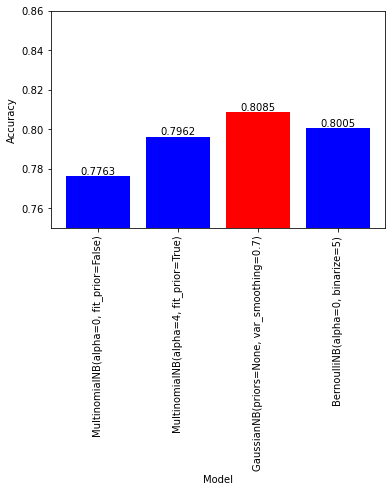

In [39]:
models = np.array(['MultinomialNB(alpha=0, fit_prior=False)',
                   'MultinomialNB(alpha=4, fit_prior=True)',
                   'GaussianNB(priors=None, var_smoothing=0.7)',
                   'BernoulliNB(alpha=0, binarize=5)'])
accuracy = np.array([0.7763,0.7962, 0.8085, 0.8005])
colors = ['b', 'b', 'r', 'b']
plt.bar(models, accuracy, color=colors)
plt.xticks(np.arange(len(models)), models,rotation=90)
plt.ylim(0.75, 0.86)
plt.xlabel('Model')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy):
    plt.text(i, v+0.001, str(v), ha='center', fontsize=10)
plt.show()

## Overall, GaussianNB(priors=None, var_smoothing=0.7) has the best performance

Save the GaussianNB model for future use (Referenced from: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

In [40]:
import pickle
pickle.dump(gaussion_nb, open('gaussion_nb.sav', 'wb'))

"""
use code below to reload the model

loaded_model = pickle.load(open('gaussion_nb.sav', 'rb'))
"""

"\nuse code below to reload the model\n\nloaded_model = pickle.load(open('gaussion_nb.sav', 'rb'))\n"

Now evaluate this GaussianNB classifier by plotting its confusion matrix to see the performance of this model on the test set and if this classifier could be further imporved in the future

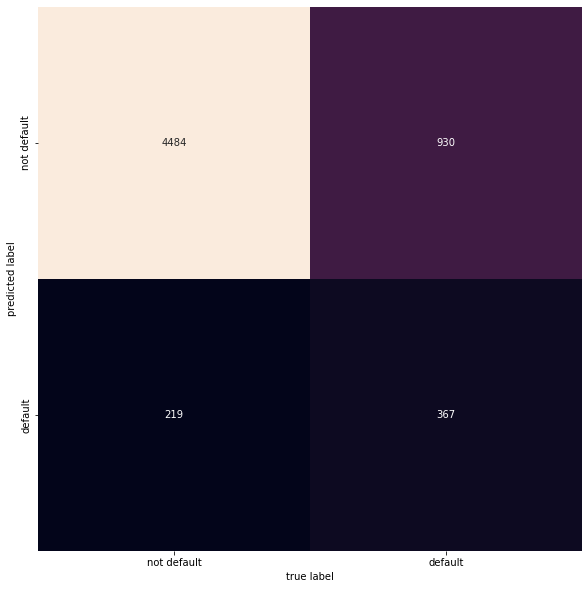

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4703
           1       0.63      0.28      0.39      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



In [41]:
gaussion_nb = GaussianNB(priors=None, var_smoothing=0.7)
gaussion_nb.fit(np.asarray(xs_train_prep.todense()), ys_train) # refit the model to get ys_test_pred of GaussianNB
ys_test_pred = gaussion_nb.predict(np.asarray(xs_test_prep.todense())) # get ys_test_pred of GaussianNB
classes = {"not default": (len(ys_test)+len(ys_train))-(sum(ys_test)+sum(ys_train)), "default":sum(ys_test)+sum(ys_train),}
mat = confusion_matrix(ys_test, ys_test_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
print(classification_report(ys_test, ys_test_pred))

As you can see here, most of the non-default predictions are very accurate. However, accuracy of default case is a bit low. The reason is that some attributes are not helpful for classification. For example, columns 12 to 23 show the same pattern regardless of whether the classification is 0 or 1 (e.g. next month's payment amount is less than the previous month's bill amount), which significantly affects the accuracy of 1 classification, as there is more data in the dataset with a 0 classification, and the model then determines that most predictions in the testing set as 0.

I have tried to analyse columns 12 to 23 with other feature engineering methods such as normalisation and binning, or without these columns. However, it does not help to improve the accuracy or even reduce it.

In the future, taking advantage of more knowledge, the accuracy would be effectively improved.